In [1]:
# JesseRuiz_nlp_project_Codeup_2019

In [66]:
from requests import get
import requests
from bs4 import BeautifulSoup
import os
import json
from pprint import pprint
import re

import itertools as it
from typing import List, Dict
import pandas as pd

import numpy as np
import unicodedata

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings("ignore")


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# Found on https://madnight.github.io/githut/#/pull_requests/2019/1
langs = ['JavaScript',
'Python',
'Java',
'Go',
'C++',
'Ruby',
'PHP',
'TypeScript',
'C#',
'C',
'Shell',
'Scala',
'Swift',
'Rust',
'Kotlin',
'Objective-C',
'Groovy',
'Elixir',
'Lua',
'DM',
'Perl',
'Dart',
'Clojure',
'PowerShell',
'CoffeeScript',
'Haskell',
'OCaml',
'R',
'Emacs Lisp',
'Vim script',
'Jsonnet',
'Erlang',
'Puppet',
'Julia',
'Smalltalk',
'MATLAB',
'WebAssembly',
'Fortran',
'F#',
'Visual Basic',
'Apex',
'ABAP',
'Vala',
'Nix',
'Crystal',
'Roff',
'Perl 6',
'FreeMarker',
'PureScript',
'Objective-C++',
'HTML',
'CSS',
'Vue']

In [54]:
langs = [element.lower() for element in langs]
langs

['javascript',
 'python',
 'java',
 'go',
 'c++',
 'ruby',
 'php',
 'typescript',
 'c#',
 'c',
 'shell',
 'scala',
 'swift',
 'rust',
 'kotlin',
 'objective-c',
 'groovy',
 'elixir',
 'lua',
 'dm',
 'perl',
 'dart',
 'clojure',
 'powershell',
 'coffeescript',
 'haskell',
 'ocaml',
 'r',
 'emacs lisp',
 'vim script',
 'jsonnet',
 'erlang',
 'puppet',
 'julia',
 'smalltalk',
 'matlab',
 'webassembly',
 'fortran',
 'f#',
 'visual basic',
 'apex',
 'abap',
 'vala',
 'nix',
 'crystal',
 'roff',
 'perl 6',
 'freemarker',
 'purescript',
 'objective-c++',
 'html',
 'css',
 'vue']

In [39]:
# Function shows a list of labels (Programming Language) of a repository. 
# The function takes a BeautifulSoup ResultSet and returns a list.
def get_labels(bs4resultset):
    labels = []
    for div in bs4resultset:
        repo_list = re.findall(r'.+', div.text.lower())
        lang = list(set(repo_list) & set(langs))
        if lang != []:
            labels.append(lang[0])
        else:
            labels.append('na')
    return labels


In [27]:
for div in repo:
    print(re.findall(r'.*\s/\s.*',div.text)[0])

microsoft / Terminal
jackfrued / Python-100-Days
jolaleye / cssfx
MisterBooo / LeetCodeAnimation
kkuchta / css-only-chat
hiroppy / fusuma
microsoft / PowerToys
TheAlgorithms / Python
edgedb / edgedb
tensorflow / graphics
flutter / flutter_web
qianguyihao / Web
flutter / flutter
teoga / awesome-product-design
996icu / 996.ICU
jaywcjlove / linux-command
CyC2018 / CS-Notes
intel / wasm-micro-runtime
dgryski / go-perfbook
NVlabs / FUNIT
azl397985856 / leetcode
sql-machine-learning / sqlflow
microsoft / vscode
markphelps / flipt
Snailclimb / JavaGuide


In [28]:
# Function shows what the user/repo_name and the label (Programming Language) is... 
# Creates a list of lists.

def repo_name_and_label(bs4resultset):
    name_label = []
    for div in bs4resultset:
        one = []
        one.append(re.findall(r'.*\s/\s.*',div.text)[0])
        lang = list(set(re.findall(r'.+', div.text.lower())) & set(langs))
        if lang != []:
            one.append(lang[0])
        else:
            one.append('na')
        name_label.append(one)
    return name_label

In [29]:
repo_name_and_label(repo)

[['microsoft / Terminal', 'c++'],
 ['jackfrued / Python-100-Days', 'html'],
 ['jolaleye / cssfx', 'vue'],
 ['MisterBooo / LeetCodeAnimation', 'java'],
 ['kkuchta / css-only-chat', 'ruby'],
 ['hiroppy / fusuma', 'css'],
 ['microsoft / PowerToys', 'na'],
 ['TheAlgorithms / Python', 'python'],
 ['edgedb / edgedb', 'python'],
 ['tensorflow / graphics', 'python'],
 ['flutter / flutter_web', 'dart'],
 ['qianguyihao / Web', 'javascript'],
 ['flutter / flutter', 'dart'],
 ['teoga / awesome-product-design', 'na'],
 ['996icu / 996.ICU', 'rust'],
 ['jaywcjlove / linux-command', 'html'],
 ['CyC2018 / CS-Notes', 'java'],
 ['intel / wasm-micro-runtime', 'c'],
 ['dgryski / go-perfbook', 'na'],
 ['NVlabs / FUNIT', 'na'],
 ['azl397985856 / leetcode', 'javascript'],
 ['sql-machine-learning / sqlflow', 'go'],
 ['microsoft / vscode', 'typescript'],
 ['markphelps / flipt', 'go'],
 ['Snailclimb / JavaGuide', 'java']]

## Acquire

### General approach to choosing what type of data to scrape from Github: 
#### Use the url: https://github.com/search?o=desc&q=stars%3A%3E1&s=updated&type=Repositories
### This page shows the most recently updates repos on Github.

In [104]:
base_url = 'https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories'

In [105]:
headers = {'User-Agent': 'student'} # codeup.com doesn't like our default user-agent
response = get(base_url)

In [106]:
print(response.text[:400])



<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://github.githubassets.com">
  <link rel="dns-prefetch" href="https://avatars0.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars1.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars2.githubusercontent.com">
  <link rel="dns-prefetch" href="https:/


In [107]:
pprint(response.text)

('\n'
 '\n'
 '<!DOCTYPE html>\n'
 '<html lang="en">\n'
 '  <head>\n'
 '    <meta charset="utf-8">\n'
 '  <link rel="dns-prefetch" href="https://github.githubassets.com">\n'
 '  <link rel="dns-prefetch" href="https://avatars0.githubusercontent.com">\n'
 '  <link rel="dns-prefetch" href="https://avatars1.githubusercontent.com">\n'
 '  <link rel="dns-prefetch" href="https://avatars2.githubusercontent.com">\n'
 '  <link rel="dns-prefetch" href="https://avatars3.githubusercontent.com">\n'
 '  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n'
 '  <link rel="dns-prefetch" '
 'href="https://user-images.githubusercontent.com/">\n'
 '\n'
 '\n'
 '\n'
 '  <link crossorigin="anonymous" media="all" '
 'integrity="sha512-3+HOqCwtQal5hOJQ+mdxiq5zmGOTjF6RhjDsPLxbKDYgGlLFeCwzoIanb7j5IiCuXKUqyC2q8FdkC4nmx2P2rA==" '
 'rel="stylesheet" '
 'href="https://github.githubassets.com/assets/frameworks-a2fba223d5af91496cac70d4ec3624df.css" '
 '/>\n'
 '  <link crossorigin="anonymous" media="

 '          4\n'
 '        </a>\n'
 '      </div>\n'
 '  </div>\n'
 '</li>\n'
 '\n'
 '        \n'
 '<li class="repo-list-item d-flex flex-column flex-md-row flex-justify-start '
 'py-4 public source" >\n'
 '  <div class="col-12 col-md-8 pr-md-3">\n'
 '    <h3>\n'
 '      <a class="v-align-middle" '
 'data-hydro-click="{&quot;event_type&quot;:&quot;search_result.click&quot;,&quot;payload&quot;:{&quot;page_number&quot;:1,&quot;per_page&quot;:10,&quot;query&quot;:&quot;stars:&gt;1&quot;,&quot;result_position&quot;:8,&quot;click_id&quot;:176023840,&quot;result&quot;:{&quot;id&quot;:176023840,&quot;global_relay_id&quot;:&quot;MDEwOlJlcG9zaXRvcnkxNzYwMjM4NDA=&quot;,&quot;model_name&quot;:&quot;Repository&quot;,&quot;url&quot;:&quot;https://github.com/pythonbrasil/pythonbrasil-2019-site&quot;},&quot;client_id&quot;:null,&quot;originating_request_id&quot;:&quot;EB3D:2087:ABCCE3:11B3438:5CD59C75&quot;,&quot;originating_url&quot;:&quot;https://github.com/search?o=desc&amp;p=1&amp;q=stars%3A%3E1&

### Create a BeautifulSoup object

In [108]:
soup = BeautifulSoup(response.content, 'html.parser')


In [109]:
soup


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars0.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars1.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars2.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars3.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/frameworks-a2fba223d5af91496cac70d4ec3624df.css" integrity="sha512-3+HOqCwtQal5hOJQ+mdxiq5zmGOTjF6RhjDsPLxbKDYgGlLFeCwzoIanb7j5IiCuXKUqyC2q8FdkC4nmx2P2rA==" media="all" rel="stylesheet">
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/site-148e617d8b0d0d490d3c4030fa22fa7a.css" integrity="sha512-OtdxTByWNKa5cJls+9iFyHPNBFmAN

### This looks for the repo class, which is structured differently than the TRENDING page which we used before...
### Each page contains 10 repos... 

In [110]:
# We search for all the repositories that have the following class. We should get back 25 objects.
repo2 = soup.findAll('li', class_='repo-list-item d-flex flex-column flex-md-row flex-justify-start py-4 public source')
print(type(repo2))

<class 'bs4.element.ResultSet'>


In [111]:
print(len(repo2))

10


In [112]:
# Show what the repo looks like

for div in repo2:
    print(div.text)




SPC-Some-Polish-Coders/PopHead



          MIT license
        

          Updated May 10, 2019








C++






          5
        






vtex/styleguide


        The VTEX Design System and React component library.
      


        styleguide


        react


        react-library


        react-components


        component-library


        frontend-components


        design-system




          Updated May 10, 2019


            1 issue
            needs help
          







JavaScript






          50
        






cncf/artwork


🖌CNCF related logos and artwork
      


        cncf


        artwork


        logos




          Updated May 10, 2019









          72
        






ItzLevvie/Office16


        List of all CDN IDs for Office 365 (incl. internal development branches)
      


        microsoft


        windows


        office


        office365


        office-365


        microsoft-office


        office16


        office2019


        

### Now that we have an entirely different HTML text structure, we have to write new regex to capture the relevant information.

### This function crawls across multiple pages to scrape these pages. Aiming for 150 repos, which is 15 pages.

In [113]:
repo2

[<li class="repo-list-item d-flex flex-column flex-md-row flex-justify-start py-4 public source">
 <div class="col-12 col-md-8 pr-md-3">
 <h3>
 <a class="v-align-middle" data-hydro-click='{"event_type":"search_result.click","payload":{"page_number":1,"per_page":10,"query":"stars:&gt;1","result_position":1,"click_id":176103847,"result":{"id":176103847,"global_relay_id":"MDEwOlJlcG9zaXRvcnkxNzYxMDM4NDc=","model_name":"Repository","url":"https://github.com/SPC-Some-Polish-Coders/PopHead"},"client_id":null,"originating_request_id":"EB3D:2087:ABCCE3:11B3438:5CD59C75","originating_url":"https://github.com/search?o=desc&amp;p=1&amp;q=stars%3A%3E1&amp;s=updated&amp;type=Repositories","referrer":null,"user_id":null}}' data-hydro-click-hmac="22fc46d8396e98527b6e9d42b05a9752d611c32fecfcea5432f7361459af2bda" href="/SPC-Some-Polish-Coders/PopHead">SPC-Some-Polish-Coders/PopHead</a>
 </h3>
 <div class="d-flex flex-wrap">
 <p class="f6 text-gray mr-3 mb-0 mt-2">
           MIT license
         </p>
 

In [167]:
for div in repo2:
    print(div.text)




SPC-Some-Polish-Coders/PopHead



          MIT license
        

          Updated May 10, 2019








C++






          5
        






vtex/styleguide


        The VTEX Design System and React component library.
      


        styleguide


        react


        react-library


        react-components


        component-library


        frontend-components


        design-system




          Updated May 10, 2019


            1 issue
            needs help
          







JavaScript






          50
        






cncf/artwork


🖌CNCF related logos and artwork
      


        cncf


        artwork


        logos




          Updated May 10, 2019









          72
        






ItzLevvie/Office16


        List of all CDN IDs for Office 365 (incl. internal development branches)
      


        microsoft


        windows


        office


        office365


        office-365


        microsoft-office


        office16


        office2019


        

In [168]:
# Function shows what the user/repo_name and the label (Programming Language) is... 
# Creates a list of lists.

def repo_name_and_label(bs4resultset):
    name_label = []
    for div in bs4resultset:
        one = []
        one.append(re.findall(r'.*/.*',div.text)[0])
        lang = list(set(re.findall(r'.+', div.text.lower())) & set(langs))
        if lang != []:
            one.append(lang[0])
        else:
            one.append('na')
        name_label.append(one)
    return name_label

In [169]:
repo_name_and_label(repo2)

[['SPC-Some-Polish-Coders/PopHead', 'c++'],
 ['vtex/styleguide', 'javascript'],
 ['cncf/artwork', 'na'],
 ['ItzLevvie/Office16', 'javascript'],
 ['betterweb-team/betterwebvote', 'python'],
 ['Frodez/BlogManagePlatform', 'java'],
 ['hyunjun/practice', 'python'],
 ['pythonbrasil/pythonbrasil-2019-site', 'css'],
 ['ModusCreateOrg/gimbal', 'typescript'],
 ['platanus/la-guia', 'na']]

In [117]:
# Finds the user/repo_name...
for div in repo2:
#     print(div.text)
    print(re.findall(r'.*/.*',div.text)[0])

SPC-Some-Polish-Coders/PopHead
vtex/styleguide
cncf/artwork
ItzLevvie/Office16
betterweb-team/betterwebvote
Frodez/BlogManagePlatform
hyunjun/practice
pythonbrasil/pythonbrasil-2019-site
ModusCreateOrg/gimbal
platanus/la-guia


In [118]:
# Finds the number of stars...
for div in repo2:
#     print(div.text)
    print(re.findall(r'(\d)', div.text))

['1', '0', '2', '0', '1', '9', '5']
['1', '0', '2', '0', '1', '9', '1', '5', '0']
['1', '0', '2', '0', '1', '9', '7', '2']
['1', '6', '3', '6', '5', '3', '6', '5', '3', '6', '5', '1', '6', '2', '0', '1', '9', '2', '0', '1', '6', '1', '9', '1', '0', '2', '0', '1', '9', '6']
['1', '0', '2', '0', '1', '9', '2']
['2', '1', '1', '2', '0', '1', '0', '2', '0', '1', '9', '2']
['1', '0', '2', '0', '1', '9', '4']
['2', '0', '1', '9', '2', '0', '1', '9', '1', '0', '2', '0', '1', '9', '5']
['1', '0', '2', '0', '1', '9', '2', '2', '0']
['1', '0', '2', '0', '1', '9', '1', '2']


### Okay, this can't be achieved with Regex... going to webscrape from the Repo site instead...

In [ ]:
url = element + '/blob/master/README.md'
response = requests.get(url)
soup = BeautifulSoup(response.text)
read_me = soup.find(class_='markdown-body entry-content p-3 p-md-6')

### How to find the URLS from many pages on this page: 
https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories

In [90]:
def get_url_list():
    urls = []
    headers = {'User-Agent': 'Student'}
    url = 'https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories'
    response = get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    max_page = 3
    for i in range(1,max_page):
        url = 'https://github.com/search?o=desc&p=' + str(i) + '&q=stars%3A%3E1&s=updated&type=Repositories/'
        print(f'traversing url: {url}')
        response = get(url, headers=headers)
        soup = BeautifulSoup(response.text)
          
        repo = soup.findAll('li', class_='repo-list-item d-flex flex-column flex-md-row flex-justify-start py-4 public source')
        for div in repo:
            one = []
            one.append(re.findall(r'.*/.*',div.text)[0])
            urls.append(one)
        print(len(urls))        
#         print(urls)
    final_urls = []
    for url in urls:
        url = 'https://github.com/'+url[0]
        final_urls.append(url)
        
        
    return final_urls
            

In [91]:
first_url_list = get_url_list()

traversing url: https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories/
10
traversing url: https://github.com/search?o=desc&p=2&q=stars%3A%3E1&s=updated&type=Repositories/
20


In [94]:
first_url_list

['https://github.com/makerdao/dss-proxy-actions',
 'https://github.com/AayushDongre/SudoDevs-Website',
 'https://github.com/underscoretype/underscore-glyphs-scripts',
 'https://github.com/OneAdder/lingtypology',
 'https://github.com/aswansyahputra/mytalk',
 'https://github.com/ainsleyclark/mesh',
 'https://github.com/Patternslib/Patterns',
 'https://github.com/ropenscilabs/ropsec',
 'https://github.com/microservices/omg-micro',
 'https://github.com/solid/information',
 'https://github.com/ropenscilabs/ropsec',
 'https://github.com/microservices/omg-micro',
 'https://github.com/solid/information',
 'https://github.com/OpenOLAT/OpenOLAT',
 'https://github.com/TYPO3-CMS/install',
 'https://github.com/HotelsDotCom/data-highway',
 'https://github.com/php/web-php',
 'https://github.com/Itay2805/TomatOS',
 'https://github.com/xriss/blender-mousepad',
 'https://github.com/ManageIQ/manageiq-ui-classic']

# Function name: get_url_list()
## This is the desired list of urls because we can use this function to find more than 100 repositories. The number of pages to scrape is hard coded into the function.

## Prepare

In [121]:
first_url_list[0]

'https://github.com/makerdao/dss-proxy-actions'

In [122]:
def get_article_text(list):
#     blobs = ['elixer-ecto/ecto', 'microsoft/calculator', 'koalaman/shellcheck', 'mjbahmani/Kaggle-Competitions']
    
    good_blobs = []
    read_me_list = []
    
    for element in list:
        url = element + '/blob/master/README.md'
        response = requests.get(url)
        soup = BeautifulSoup(response.text)
        read_me = soup.find(class_='markdown-body entry-content p-3 p-md-6')
#         read_me_list.append(str(blob) + ':')
        if read_me != None:
        
            read_me_list.append(read_me.text)
            good_blobs.append(element)
    result = pd.DataFrame(np.column_stack([good_blobs, read_me_list]), columns=['repo_name', 'readme'])
    return result

In [123]:
len(get_article_text(first_url_list))

18

In [102]:
len(get_article_text(first_url_list))

18

In [103]:
get_article_text(first_url_list)

,repo_name,readme
0,https://github.com/makerdao/dss-proxy-actions,dss-proxy-actions\nInitial version of the prox...
1,https://github.com/underscoretype/underscore-g...,Underscore Glyphs Scripts\nAn assorted collect...
2,https://github.com/OneAdder/lingtypology,lingtypology\n\nThis library is a Python3 tool...
3,https://github.com/aswansyahputra/mytalk,R-related Talks\n\n2018-11-15 Kopdar useR! Ban...
4,https://github.com/ainsleyclark/mesh,\n\n\n\n\n\n mesh\n\n\n A pure open source S...
5,https://github.com/Patternslib/Patterns,Patterns\n\nPatterns is a toolkit that enables...
6,https://github.com/ropenscilabs/ropsec,\nrOpenSci Unconf 18 Project : ropsec\n \nPer...
7,https://github.com/microservices/omg-micro,OMG: Micro Framework\nA micro-framework for th...
8,https://github.com/solid/information,"About\n\n\nSolid (derived from ""social linked ..."
9,https://github.com/ropenscilabs/ropsec,\nrOpenSci Unconf 18 Project : ropsec\n \nPer...


In [213]:
blob_list = [['microsoft / Terminal'],
 ['jackfrued / Python-100-Days'],
 ['kkuchta / css-only-chat'],
 ['microsoft / PowerToys'],
 ['jolaleye / cssfx'],
 ['MisterBooo / LeetCodeAnimation']]

In [219]:
blob_list[0][0]

'microsoft / Terminal'

In [255]:
def get_repo_all(urls):
    good_blobs = []
    read_me_list = []
    language_top = []
    stars = []
    for url in urls:
        response = requests.get(url)        
        soup = BeautifulSoup(response.text)
        read_me = soup.find(class_='markdown-body entry-content p-5')
        
        if read_me != None:
            if soup.find('span', class_='lang') != None:
                language_rm = soup.find('span', class_='lang').text
                language_top.append(language_rm)
            else: 
                language_top.append('None')
                
            if soup.find('a', class_='social-count js-social-count') != None:
                stars.append((re.findall(r'(\d+)', soup.find('a', class_='social-count js-social-count').attrs['aria-label']))[0])
            else:
                stars.append('None')
            read_me_list.append(read_me.text)
            good_blobs.append(url.split('/', 3)[-1])       
            
            print('Total number of repos scraped...', len(good_blobs))
    df = pd.DataFrame(list(zip(good_blobs,language_top, read_me_list, stars)))
    df.columns = ['title', 'language', 'original', 'stars']
    return df

In [256]:
get_repo_all(first_url_list)

Total number of repos scraped... 1
Total number of repos scraped... 2
Total number of repos scraped... 3
Total number of repos scraped... 4
Total number of repos scraped... 5
Total number of repos scraped... 6
Total number of repos scraped... 7
Total number of repos scraped... 8
Total number of repos scraped... 9
Total number of repos scraped... 10
Total number of repos scraped... 11
Total number of repos scraped... 12
Total number of repos scraped... 13
Total number of repos scraped... 14
Total number of repos scraped... 15
Total number of repos scraped... 16
Total number of repos scraped... 17
Total number of repos scraped... 18


,title,language,original,stars
0,makerdao/dss-proxy-actions,Solidity,dss-proxy-actions\nInitial version of the prox...,3
1,underscoretype/underscore-glyphs-scripts,Python,Underscore Glyphs Scripts\nAn assorted collect...,3
2,OneAdder/lingtypology,Python,lingtypology\n\nThis library is a Python3 tool...,4
3,aswansyahputra/mytalk,HTML,R-related Talks\n\n2018-11-15 Kopdar useR! Ban...,2
4,ainsleyclark/mesh,CSS,\n\n\n\n\n\n mesh\n\n\n A pure open source S...,9
5,Patternslib/Patterns,JavaScript,Patterns\n\nPatterns is a toolkit that enables...,94
6,ropenscilabs/ropsec,Shell,\nrOpenSci Unconf 18 Project : ropsec\n \nPer...,21
7,microservices/omg-micro,Python,OMG: Micro Framework\nA micro-framework for th...,39
8,solid/information,None,"About\n\n\nSolid (derived from ""social linked ...",47
9,ropenscilabs/ropsec,Shell,\nrOpenSci Unconf 18 Project : ropsec\n \nPer...,21


### We have a working master notebook that saves a large dataframe with all the repos. Because this is so big, we saved it to a csv. 

## Read in CSV.

In [113]:
from env import path
path

'~/Documents/Coding/Codeup/CourseWork/nlp_project/'

In [114]:
file = 'github_data.csv'

In [115]:
df = pd.read_csv(path+file, header='infer', index_col=0)

In [116]:
df

,title,language,original,stars
0,IamTinashe/College-Hub,Vue,College-Hub\n\nWeb-based accommodation service...,2
1,EetuPe/Bounce,JavaScript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3
2,machsix/Super-preloader,JavaScript,\n \nSuper-preloader\nDocument\nComplete D...,17
3,dotnet/docs.tr-tr,PowerShell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8
4,vadxq/pushQQlove,JavaScript,pushQQlove\nweather and to remind of the time ...,2
5,bajumar/Azure-Monitor-Logs,None,My Azure Monitor Logs Repo\nThis repo contains...,2
6,gigantum/gigantum-testing,Python,Gigantum Testing\nAutomation of Gigantum testi...,3
7,dequelabs/cauldron-react,JavaScript,Cauldron React\nThis project is used internall...,4
8,c-koi/gmic-qt,C++,G'MIC-Qt: a versatile G'MIC plugin\nPurpose\nG...,44
9,GeneZharov/introversion,JavaScript,Introversion.js\nTool for debugging JavaScript...,8


In [117]:
df.shape

(155, 4)

In [118]:
gh = df.copy()

In [119]:
gh.shape

(155, 4)

## Clean

In [120]:
def original_word_count():
    df[['original_cnt']] = df[['original']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        df.original_cnt[art_num] = len(df['original'][art_num].split())
    df['original_cnt']=df['original_cnt'].astype(int)
    return df

In [121]:
original_word_count()
df.head()

,title,language,original,stars,original_cnt
0,IamTinashe/College-Hub,Vue,College-Hub\n\nWeb-based accommodation service...,2,55
1,EetuPe/Bounce,JavaScript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3,42
2,machsix/Super-preloader,JavaScript,\n \nSuper-preloader\nDocument\nComplete D...,17,372
3,dotnet/docs.tr-tr,PowerShell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8,150
4,vadxq/pushQQlove,JavaScript,pushQQlove\nweather and to remind of the time ...,2,309


In [122]:
def basic_clean():
    
    df[['article']] = df[['original']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        original = df.article[art_num]
        article = re.sub(r'\s', ' ', original).lower()
        normalized = unicodedata.normalize('NFKD', article)
        just_ascii = normalized.encode('ascii', 'ignore')
        article = just_ascii.decode('utf-8')
        without_special_chars = re.sub(r'[^\w\s]', ' ', article)
        word_list = without_special_chars.split()
        article_final = ' '.join(word_list)
        df.article[art_num] = article_final
    return df

In [123]:
basic_clean()

,title,language,original,stars,original_cnt,article
0,IamTinashe/College-Hub,Vue,College-Hub\n\nWeb-based accommodation service...,2,55,college hub web based accommodation service bu...
1,EetuPe/Bounce,JavaScript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3,42,bounce bounce or bounce 2 the ultimate remaste...
2,machsix/Super-preloader,JavaScript,\n \nSuper-preloader\nDocument\nComplete D...,17,372,super preloader document complete document dif...
3,dotnet/docs.tr-tr,PowerShell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8,150,ms openlocfilehash ms sourcegitcommit ms trans...
4,vadxq/pushQQlove,JavaScript,pushQQlove\nweather and to remind of the time ...,2,309,pushqqlove weather and to remind of the time a...
5,bajumar/Azure-Monitor-Logs,None,My Azure Monitor Logs Repo\nThis repo contains...,2,98,my azure monitor logs repo this repo contains ...
6,gigantum/gigantum-testing,Python,Gigantum Testing\nAutomation of Gigantum testi...,3,218,gigantum testing automation of gigantum testin...
7,dequelabs/cauldron-react,JavaScript,Cauldron React\nThis project is used internall...,4,297,cauldron react this project is used internally...
8,c-koi/gmic-qt,C++,G'MIC-Qt: a versatile G'MIC plugin\nPurpose\nG...,44,249,g mic qt a versatile g mic plugin purpose g mi...
9,GeneZharov/introversion,JavaScript,Introversion.js\nTool for debugging JavaScript...,8,3192,introversion js tool for debugging javascript ...


In [124]:
def article_word_count():
    df[['article_cnt']] = df[['article']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        df.article_cnt[art_num] = len(df['article'][art_num].split())
    df['article_cnt']=df['article_cnt'].astype(int)
    return df

In [125]:
article_word_count()

,title,language,original,stars,original_cnt,article,article_cnt
0,IamTinashe/College-Hub,Vue,College-Hub\n\nWeb-based accommodation service...,2,55,college hub web based accommodation service bu...,50
1,EetuPe/Bounce,JavaScript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3,42,bounce bounce or bounce 2 the ultimate remaste...,40
2,machsix/Super-preloader,JavaScript,\n \nSuper-preloader\nDocument\nComplete D...,17,372,super preloader document complete document dif...,394
3,dotnet/docs.tr-tr,PowerShell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8,150,ms openlocfilehash ms sourcegitcommit ms trans...,159
4,vadxq/pushQQlove,JavaScript,pushQQlove\nweather and to remind of the time ...,2,309,pushqqlove weather and to remind of the time a...,189
5,bajumar/Azure-Monitor-Logs,None,My Azure Monitor Logs Repo\nThis repo contains...,2,98,my azure monitor logs repo this repo contains ...,96
6,gigantum/gigantum-testing,Python,Gigantum Testing\nAutomation of Gigantum testi...,3,218,gigantum testing automation of gigantum testin...,208
7,dequelabs/cauldron-react,JavaScript,Cauldron React\nThis project is used internall...,4,297,cauldron react this project is used internally...,298
8,c-koi/gmic-qt,C++,G'MIC-Qt: a versatile G'MIC plugin\nPurpose\nG...,44,249,g mic qt a versatile g mic plugin purpose g mi...,315
9,GeneZharov/introversion,JavaScript,Introversion.js\nTool for debugging JavaScript...,8,3192,introversion js tool for debugging javascript ...,3075


In [126]:
def lemmatize():
    
    df[['lemmatized']] = df[['article']]
    art_nums = list(range(df.article.count()))
    wnl = nltk.stem.WordNetLemmatizer()
    for art_num in art_nums:
        lemm_article = df.lemmatized[art_num]
        lemmas = [wnl.lemmatize(word) for word in lemm_article.split()]
        article_lemmatized = ' '.join(lemmas)
        df.lemmatized[art_num] = article_lemmatized
    return df

In [127]:
lemmatize()

,title,language,original,stars,original_cnt,article,article_cnt,lemmatized
0,IamTinashe/College-Hub,Vue,College-Hub\n\nWeb-based accommodation service...,2,55,college hub web based accommodation service bu...,50,college hub web based accommodation service bu...
1,EetuPe/Bounce,JavaScript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3,42,bounce bounce or bounce 2 the ultimate remaste...,40,bounce bounce or bounce 2 the ultimate remaste...
2,machsix/Super-preloader,JavaScript,\n \nSuper-preloader\nDocument\nComplete D...,17,372,super preloader document complete document dif...,394,super preloader document complete document dif...
3,dotnet/docs.tr-tr,PowerShell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8,150,ms openlocfilehash ms sourcegitcommit ms trans...,159,m openlocfilehash m sourcegitcommit m translat...
4,vadxq/pushQQlove,JavaScript,pushQQlove\nweather and to remind of the time ...,2,309,pushqqlove weather and to remind of the time a...,189,pushqqlove weather and to remind of the time a...
5,bajumar/Azure-Monitor-Logs,None,My Azure Monitor Logs Repo\nThis repo contains...,2,98,my azure monitor logs repo this repo contains ...,96,my azure monitor log repo this repo contains e...
6,gigantum/gigantum-testing,Python,Gigantum Testing\nAutomation of Gigantum testi...,3,218,gigantum testing automation of gigantum testin...,208,gigantum testing automation of gigantum testin...
7,dequelabs/cauldron-react,JavaScript,Cauldron React\nThis project is used internall...,4,297,cauldron react this project is used internally...,298,cauldron react this project is used internally...
8,c-koi/gmic-qt,C++,G'MIC-Qt: a versatile G'MIC plugin\nPurpose\nG...,44,249,g mic qt a versatile g mic plugin purpose g mi...,315,g mic qt a versatile g mic plugin purpose g mi...
9,GeneZharov/introversion,JavaScript,Introversion.js\nTool for debugging JavaScript...,8,3192,introversion js tool for debugging javascript ...,3075,introversion j tool for debugging javascript e...


In [128]:
def lemm_word_count():
    df[['lemm_cnt']] = df[['article']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        df.lemm_cnt[art_num] = len(df['lemmatized'][art_num].split())
        
    df.lemm_cnt = df.lemm_cnt.astype(int)
    return df

In [129]:
lemm_word_count()

,title,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt
0,IamTinashe/College-Hub,Vue,College-Hub\n\nWeb-based accommodation service...,2,55,college hub web based accommodation service bu...,50,college hub web based accommodation service bu...,50
1,EetuPe/Bounce,JavaScript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3,42,bounce bounce or bounce 2 the ultimate remaste...,40,bounce bounce or bounce 2 the ultimate remaste...,40
2,machsix/Super-preloader,JavaScript,\n \nSuper-preloader\nDocument\nComplete D...,17,372,super preloader document complete document dif...,394,super preloader document complete document dif...,394
3,dotnet/docs.tr-tr,PowerShell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8,150,ms openlocfilehash ms sourcegitcommit ms trans...,159,m openlocfilehash m sourcegitcommit m translat...,159
4,vadxq/pushQQlove,JavaScript,pushQQlove\nweather and to remind of the time ...,2,309,pushqqlove weather and to remind of the time a...,189,pushqqlove weather and to remind of the time a...,189
5,bajumar/Azure-Monitor-Logs,None,My Azure Monitor Logs Repo\nThis repo contains...,2,98,my azure monitor logs repo this repo contains ...,96,my azure monitor log repo this repo contains e...,96
6,gigantum/gigantum-testing,Python,Gigantum Testing\nAutomation of Gigantum testi...,3,218,gigantum testing automation of gigantum testin...,208,gigantum testing automation of gigantum testin...,208
7,dequelabs/cauldron-react,JavaScript,Cauldron React\nThis project is used internall...,4,297,cauldron react this project is used internally...,298,cauldron react this project is used internally...,298
8,c-koi/gmic-qt,C++,G'MIC-Qt: a versatile G'MIC plugin\nPurpose\nG...,44,249,g mic qt a versatile g mic plugin purpose g mi...,315,g mic qt a versatile g mic plugin purpose g mi...,315
9,GeneZharov/introversion,JavaScript,Introversion.js\nTool for debugging JavaScript...,8,3192,introversion js tool for debugging javascript ...,3075,introversion j tool for debugging javascript e...,3075


### Examine how the lemmatize function worked... It looks like it didn't do TOO much work.

In [130]:
df['article'].iloc[0]


'college hub web based accommodation service build setup install dependencies npm install serve with hot reload at localhost 3000 npm run dev build for production and launch server npm run build npm start generate static project npm run generate for detailed explanation on how things work checkout nuxt js docs'

In [131]:
df['lemmatized'].iloc[0]

# df.loc[df['A'] == 'foo']

'college hub web based accommodation service build setup install dependency npm install serve with hot reload at localhost 3000 npm run dev build for production and launch server npm run build npm start generate static project npm run generate for detailed explanation on how thing work checkout nuxt j doc'

## Explore the data that you have scraped. Here are some ideas for exploration:

* What are the most common words in READMEs?
* What does the distribution of IDFs look like for the most common words?
* Does the length of the README vary by language?
* Do different languages use a different number of unique words?

In [132]:
df.dtypes

title           object
language        object
original        object
stars            int64
original_cnt     int64
article         object
article_cnt      int64
lemmatized      object
lemm_cnt         int64
dtype: object

In [133]:
df.language.value_counts()

JavaScript          24
Python              23
TypeScript          14
PowerShell          13
HTML                 9
Java                 8
None                 8
C++                  7
C#                   6
Shell                5
C                    4
R                    4
CSS                  4
Ruby                 4
Vue                  3
F#                   3
Perl 6               3
Swift                2
Apex                 2
Smalltalk            2
Kotlin               2
OCaml                1
Fortran              1
Objective-C          1
Jupyter Notebook     1
Go                   1
Name: language, dtype: int64

### Make sure the language column is lower cased

In [134]:
df['language'] = df['language'].str.lower()

In [135]:
df.head()

,title,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt
0,IamTinashe/College-Hub,vue,College-Hub\n\nWeb-based accommodation service...,2,55,college hub web based accommodation service bu...,50,college hub web based accommodation service bu...,50
1,EetuPe/Bounce,javascript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3,42,bounce bounce or bounce 2 the ultimate remaste...,40,bounce bounce or bounce 2 the ultimate remaste...,40
2,machsix/Super-preloader,javascript,\n \nSuper-preloader\nDocument\nComplete D...,17,372,super preloader document complete document dif...,394,super preloader document complete document dif...,394
3,dotnet/docs.tr-tr,powershell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8,150,ms openlocfilehash ms sourcegitcommit ms trans...,159,m openlocfilehash m sourcegitcommit m translat...,159
4,vadxq/pushQQlove,javascript,pushQQlove\nweather and to remind of the time ...,2,309,pushqqlove weather and to remind of the time a...,189,pushqqlove weather and to remind of the time a...,189


### Drop repos that have a low wordcount in the Readme file

In [136]:
df = df[df.original_cnt > 10]

In [137]:
df.shape

(148, 9)

In [144]:
df.head()

,title,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt
0,IamTinashe/College-Hub,vue,College-Hub\n\nWeb-based accommodation service...,2,55,college hub web based accommodation service bu...,50,college hub web based accommodation service bu...,50
1,EetuPe/Bounce,javascript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3,42,bounce bounce or bounce 2 the ultimate remaste...,40,bounce bounce or bounce 2 the ultimate remaste...,40
2,machsix/Super-preloader,javascript,\n \nSuper-preloader\nDocument\nComplete D...,17,372,super preloader document complete document dif...,394,super preloader document complete document dif...,394
3,dotnet/docs.tr-tr,powershell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8,150,ms openlocfilehash ms sourcegitcommit ms trans...,159,m openlocfilehash m sourcegitcommit m translat...,159
4,vadxq/pushQQlove,javascript,pushQQlove\nweather and to remind of the time ...,2,309,pushqqlove weather and to remind of the time a...,189,pushqqlove weather and to remind of the time a...,189


In [145]:
def remove_stopwords(extra_words=None, exclude_words=None):
    df = lemmatize()
    stopwords = nltk.corpus.stopwords.words('english')

    
    if extra_words != None:
        stopwords = stopwords + extra_words
    if exclude_words != None:
        stopwords = [word for word in stopwords if word not in exclude_words]
        
    
    df[['clean']] = df[['lemmatized']]
    df[['word_cnt_after_stop']] = df[['title']]

    art_nums = list(range(df.clean.count()))
    for art_num in art_nums:
        words = df.clean[art_num].split()
        without_stopwords = [word for word in words if word not in stopwords]
        df.word_cnt_after_stop[art_num] = len(without_stopwords)
        without_stopwords_join = ' '.join(without_stopwords)
        df.clean[art_num] = without_stopwords_join
    df[['per_stopwords_kept']] = df[['title']]
    df[['per_stopwords_kept']] = df.word_cnt_after_stop / df.lemm_cnt
    df[['per_stopwords_kept']] = df[['per_stopwords_kept']].astype(float)
    
    df[['per_overall_kept']] = df[['title']]
    df[['per_overall_kept']] = df.word_cnt_after_stop / df.original_cnt
    df[['per_overall_kept']] = df[['per_overall_kept']].astype(float)
   
    return df

In [146]:
remove_stopwords(extra_words=langs)

KeyError: 68

In [ ]:
top_langs = pd.DataFrame(df['language'].value_counts()[df['language'].value_counts()>5])
top_langs

In [ ]:
top_langs_list = list(top_langs.index)
top_langs_list

In [ ]:
top_gh = df[df['language'].isin(top_langs_list)]

In [ ]:
top_gh.shape

## Visualize

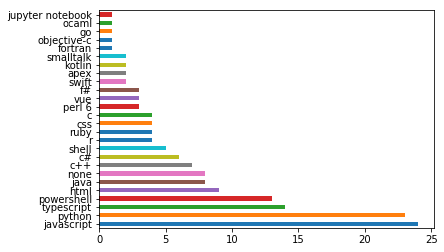

In [67]:
df.language.value_counts().plot.barh()

### Explore the repos readme's that are PYTHON language...

In [71]:
py = df[df.language == 'python']
py.head()

,title,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt
6,gigantum/gigantum-testing,python,Gigantum Testing\nAutomation of Gigantum testi...,3,218,gigantum testing automation of gigantum testin...,208,gigantum testing automation of gigantum testin...,208
11,damng/hackernews-rss-with-inlined-content,python,hackernews-rss-inlined-content\nLoads the hack...,10,176,hackernews rss inlined content loads the hacke...,202,hackernews r inlined content load the hackerne...,202
16,bazelbuild/rules_jvm_external,python,rules_jvm_external\nTransitive Maven artifact ...,46,1077,rules_jvm_external transitive maven artifact r...,1150,rules_jvm_external transitive maven artifact r...,1150
19,bazelbuild/rules_jvm_external,python,rules_jvm_external\nTransitive Maven artifact ...,46,1077,rules_jvm_external transitive maven artifact r...,1150,rules_jvm_external transitive maven artifact r...,1150
23,sphinx-gallery/sphinx-gallery,python,Sphinx-Gallery\n\n\nA Sphinx extension that bu...,147,178,sphinx gallery a sphinx extension that builds ...,193,sphinx gallery a sphinx extension that build a...,193


In [75]:
py_words = ' '.join(py.article)

In [76]:
py_words

'gigantum testing automation of gigantum testing with selenium installation first create and activate a python virtual environment for this project python3 m venv testenv source testenv bin activate pip3 install r requirements txt next install the binary browser drivers so that you can programmatically interact with the browser web driver for chrome chromium brew install chromedriver web driver for firefox brew install geckodriver starting gigantum client under_test before running the harness ensure the gigantum client is installed and running testing the stable build pip3 install gigantum gigantum install gigantum start testing the edge build pip3 install gigantum gigantum install e gigantum start e usage to run all tests using regular chrome driver note this may take a while put a valid username and password into the untracked credentials txt echo e my_username nmy_password credentials txt now run the driver python3 driver py to run only example tests in headless mode python3 driver 

(-0.5, 399.5, 199.5, -0.5)

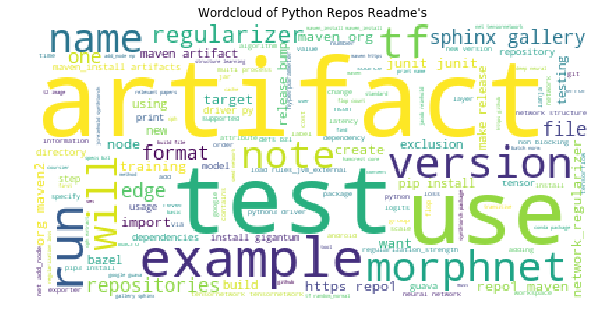

In [79]:
from wordcloud import WordCloud
img = WordCloud(background_color='white').generate(py_words)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.figure(figsize=(10,10))
plt.imshow(img)

plt.title('Wordcloud of Python Repos Readme\'s')
plt.axis('off')

### This shows us artifact, test and use are used a lot in Python Repo Readme files.

In [81]:
all_words = ' '.join(df.article)
all_freq = pd.Series(all_words).value_counts()


### Compare the Python words with the All words collection in a Wordcloud

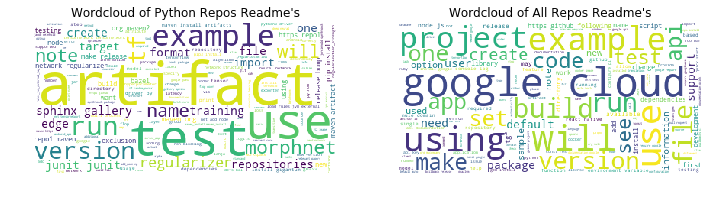

In [83]:
plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
img = WordCloud(background_color='white').generate(py_words)
plt.imshow(img)
plt.title('Wordcloud of Python Repos Readme\'s')
plt.axis('off')

plt.subplot(1, 2, 2)
img = WordCloud(background_color='white').generate(all_words)
plt.imshow(img)
plt.title('Wordcloud of All Repos Readme\'s')
plt.axis('off')

# fig.tight_layout(pad=2)

plt.box(False)

## Model

## Predict